# SYSTOLICBP DATA SET #

## IMPORT MODULES ##

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as sm
import math
from pandas.stats.api import ols
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as m_sel
import plotly.offline as plot
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.utils import shuffle
import statsmodels.stats.diagnostic as sms
plot.offline.init_notebook_mode(connected = True)

## LOAD DATA ##

In [34]:
systolic = pd.read_csv('Ex03_SystolicBP_Regreesion.csv')
systolic = shuffle(systolic)
systolic.dropna(axis = 0, inplace = True)

## CORRELATION MATRIX ##

In [3]:
correlation_matrix = systolic.corr()
correlation_matrix

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
Age,1.000000,-0.072606,0.075297,0.004664,-0.114006,-0.028380,0.151895,-0.126357,0.669539
Treated,-0.072606,1.000000,0.050122,-0.052271,-0.117269,-0.006899,-0.069158,0.033868,0.476901
Gender,0.075297,0.050122,1.000000,-0.152274,-0.004839,-0.003728,-0.002139,-0.007238,0.083053
FamilySize,0.004664,-0.052271,-0.152274,1.000000,0.071975,-0.038084,-0.178930,0.088567,0.020711
Diet,-0.114006,-0.117269,-0.004839,0.071975,1.000000,0.214507,-0.030904,0.150477,-0.071370
Weight,-0.028380,-0.006899,-0.003728,-0.038084,0.214507,1.000000,-0.100371,0.725423,0.361718
Height,0.151895,-0.069158,-0.002139,-0.178930,-0.030904,-0.100371,1.000000,-0.746394,-0.307311
ScaledBMI,-0.126357,0.033868,-0.007238,0.088567,0.150477,0.725423,-0.746394,1.000000,0.447285
SystolicBP,0.669539,0.476901,0.083053,0.020711,-0.071370,0.361718,-0.307311,0.447285,1.000000


## CORRELATION GRAPH ##

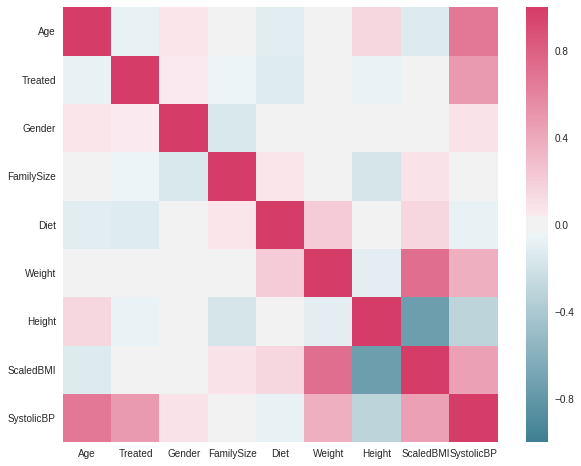

In [4]:
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(correlation_matrix, 
            mask = np.zeros_like(correlation_matrix, dtype = np.bool),
            cmap = sns.diverging_palette(220, 1, as_cmap = True),
            square = True,
            ax = ax)
plt.show()

## SCATTER GRAPH ##

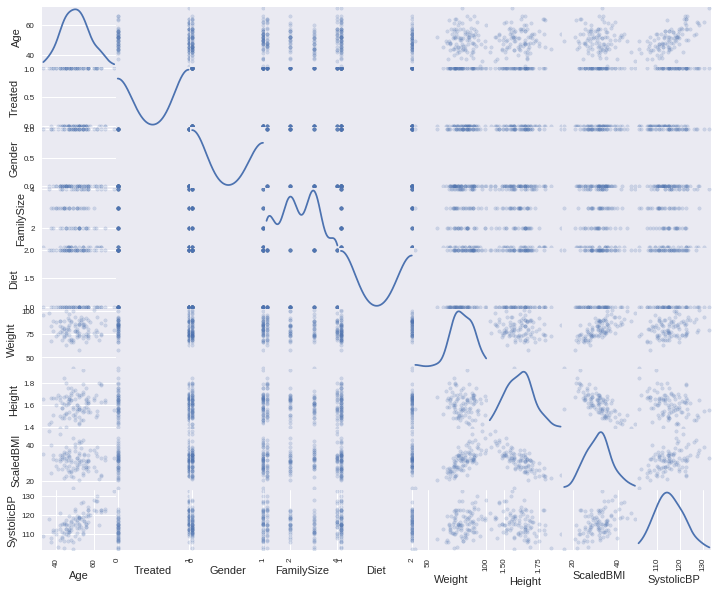

In [5]:
pd.scatter_matrix(systolic, alpha = .2, figsize = (12, 10), diagonal = 'kde')
plt.show()

## NORMALIZING DATA ##

In [6]:
data_norm = systolic

for i in data_norm.columns.tolist():
    data_norm[i] = (data_norm[i] - data_norm[i].mean()) / (data_norm[i].var())

## SPLITTING TRAINING AND TESTING DATA ##

In [7]:
X_rl = pd.get_dummies(data_norm).drop('SystolicBP', axis = 1)
y_rl = data_norm.SystolicBP
X_train, X_test , Y_train, Y_test = m_sel.train_test_split(X_rl, y_rl, test_size = 0.30, random_state = 20)

## LINEAR REGRESSION MODEL ##

In [8]:
reg = linear_model.LinearRegression(normalize = True)
reg.fit(X_train, Y_train)
print ('Coefficients : ', reg.coef_) 
print ('\nIntercepts  : ', reg.intercept_)
print ('\nRoot Mean Square Error : ', math.sqrt(np.mean((reg.predict(X_test) - Y_test) ** 2)))

Coefficients :  [  9.17674691e-01   4.12099535e-02   1.51518143e-04  -4.61875164e-04
  -1.86499309e-04   2.28246822e-02  -8.25361314e-05   4.72734161e-01]

Intercepts  :  -0.000190124859884

Root Mean Square Error :  0.003260805346911581


## REGRESSION MODEL PLOT ##

In [9]:
trace1 = go.Scatter(
    x = reg.predict(X_test),
    y = Y_test,
    mode = 'markers',
    name = 'Predicted vs Original',
    line = dict(shape = 'linear')
)
trace2 = go.Scatter(
    x = Y_test,
    y = Y_test,
    mode = 'lines',
    name = 'x = y',
    line = dict(shape = 'linear')
)
data = [trace1, trace2]
layout = dict(
    title = 'SCATTER PLOT FOR REGRESSION MODEL',
    xaxis = dict(
        title = 'PREDICTED VALUE '
    ),
    yaxis = dict(
        title = 'ORIGINAL VALUE'
    ),
    legend = dict(
        traceorder = 'reversed',
        font = dict(size = 16)
    )
)
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename = 'SYTOLICBP_Regression Model')


## BOX PLOT FOR REGRESSION ##

In [10]:
trace1 = go.Box(
    y = (reg.predict(X_test) - Y_test)
)
data = [trace1]
plot.iplot(data)

## RIDGE REGRESSION ##

In [19]:
alphas_ridge = 10 ** np.linspace(-3, 2, 300)

ridge = linear_model.Ridge(normalize = True)
coefs = []
for a in alphas_ridge:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)


coefs = np.array(coefs)
df_ridge = (pd.DataFrame(coefs, columns = X_train.columns, index = alphas_ridge))


## WEIGHT VS ALPHA ##

In [20]:
data = []
for r in range(len(X_train.columns)):
    trace = go.Scatter(
        x = alphas_ridge,
        y = coefs[:, r],
        mode='lines+markers',
        name = X_train.columns[r],
        line=dict(shape='linear')
    )
    data.append(trace)
layout = dict(
    title='WEIGHTS VS ALPHAS',
    yaxis = dict(
        range = [-3,3],
        title='WEIGHT'
    ),
    xaxis = dict(
        range = [0,0.1],
        title='ALPHAS'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    ))

fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='WEIGHT_VS_ALPHA_SYSTOLICBP')


## MEAN ERROR VS ALPHA ##

In [21]:
data = []
p = go.Scatter(x = alphas_ridge, 
               y = mean_squared_error(Y_test, ridge.predict(X_test)), 
               mode='lines+markers',
               name='Mean Error', 
               hoverinfo='name',
               line=dict(shape='linear'))
data.append(p)        
layout = dict(
    title='MEAN SQUARE ERROR VS ALPHAS',
    xaxis=dict(
        title='ALPHAS'
    ),
    yaxis=dict(
        title='MEAN SQUARE ERROR'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='MEANERROR_VS_APLHA_SYSTOLICBP')

## LASSO ##

In [22]:
alphas_lasso = np.linspace(2, -2, 100) * 0.5 
lasso = linear_model.Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas_lasso:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)


coefs = np.array(coefs)
df_lasso = (pd.DataFrame(coefs, columns= X_train.columns, index=alphas_lasso))

## WEIGHT VS ALPHA ##

In [33]:
data = []
for r in range(len(X_train.columns)):
    trace = go.Scatter(
        x = alphas_lasso,
        y = coefs[:, r],
        mode='lines+markers',
        name = X_train.columns[r],
        line = dict(shape = 'linear')
    )
    data.append(trace)
layout = dict(
    title='WEIGHTS VS ALPHAS',
    yaxis = dict(
        range = [-3, 3],
        title = 'WEIGHT'
    ),
    xaxis = dict(
        range = [0, 0.1],
        title = 'ALPHAS'
    ),
    legend = dict(
        traceorder = 'reversed',
        font = dict(size = 16)
    ))

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename = 'WEIGHT_VS_ALPHA_SYSTOLICBP')

## LASSO CV ##

In [25]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

1.0717822146687498e-05

In [27]:
pd.Series(lasso.coef_, index=X_test.columns)

Age           0.916880
Treated       0.041174
Gender        0.000105
FamilySize   -0.000369
Diet         -0.000122
Weight        0.015063
Height       -0.000000
ScaledBMI     0.478850
dtype: float64

## OLS REGRESSION ##

In [28]:
ols_result = sm.ols(formula="SystolicBP ~ Age + Treated + ScaledBMI", data = data_norm.iloc[:math.floor(len(data_norm)*0.70),:]).fit()
ols_result.params
predict_ols = ols_result.predict(X_test)
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.673e+04
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          8.11e-117
Time:                        18:59:40   Log-Likelihood:                 315.27
No. Observations:                  70   AIC:                            -622.5
Df Residuals:                      66   BIC:                            -613.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0005      0.000     -1.490      0.141      -0.001       0.000
Age            0.9194      0.002    387.335      0.000       0.915       0.924
Treated        0.0412      0.000    246.613      0.000       0.041       0.042
ScaledBMI      0.4887      0.002    244.403      0.000       0.485       0.493
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.311
Skew:                           0.053   Prob(JB):                        0.856
Kurtosis:                       2.691   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SCATTER PLOT FOR OLS ##

In [29]:
trace1 = go.Scatter(
    x=predict_ols,
    y= Y_test,
    mode='markers',
    name = 'PREDICTED VS ORIGINAL',
    line=dict(shape='linear')
)
trace2 = go.Scatter(
    x= Y_test,
    y= Y_test,
    mode='lines',
    name = 'x = y',
    line=dict(shape='linear')
)
data = [trace1, trace2]
layout = dict(
    title='PREDICTED VS ORIGINAL',
    yaxis = dict(
        title='PREDICTED VALUE'
    ),
    xaxis = dict(
        title='ORIGINAL VALUE'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='SCATTER PLOT FOR OLS')


## HISTOGRAM FOR OLS ##

In [30]:
data = [go.Histogram(x=((predict_ols - Y_test)))]
layout = go.Layout(
    title='FREQUENCY OF RESIDUALS',
    xaxis=dict(
        title='RESIDUALS'
    ),
    yaxis=dict(
        title='FREQUENCY'
    )
)
fig = go.Figure(data=data, layout=layout)
plot.iplot(fig, filename='OLS_HISTOGRAM_SYSTOLICBP')

## BOX PLOT FOR OLS ##

In [31]:
trace1 = go.Box(
    y = (predict_ols - Y_test)
)
data = [trace1]
plot.iplot(data)

## Goldfeld Quandt Test ##

In [32]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(ols_result.resid, ols_result.model.exog)
list(zip(name, test))

[('F statistics', 1.1895957532764567), ('p_value', 0.31591945707566033)]